In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [123]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url, index_col = 0)

In [124]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 55.3 KB


In [125]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


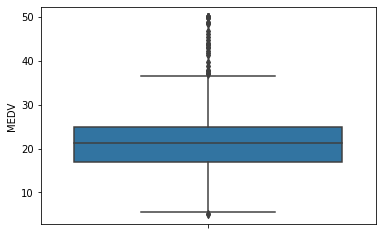

In [126]:
# For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(y = 'MEDV', data = boston_df)

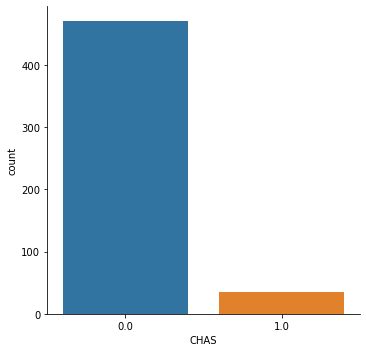

In [127]:
# Provide a  histogram for the Charles river variable

sns.catplot(x='CHAS', kind='count', data=boston_df)

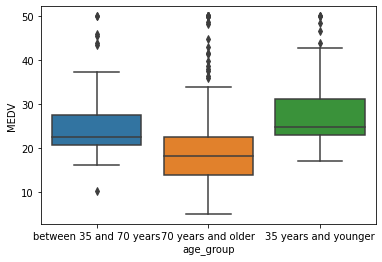

In [128]:
# Provide a boxplot for the MEDV variable vs the AGE variable.
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'


sns.boxplot(x = 'age_group', y = 'MEDV', data = boston_df)

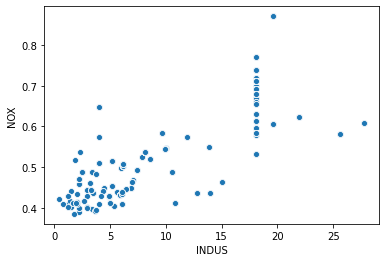

In [116]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
# What can you say about the relationship?

sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df)

In [ ]:
# the relationship: increase in the proportion of non-retail business acres per town leads to increase nitric oxide concentrations

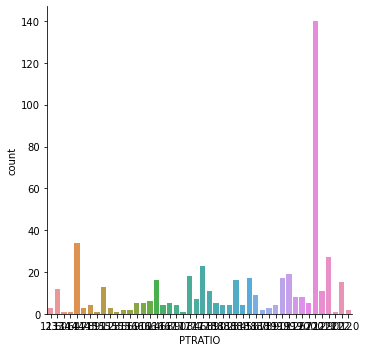

In [129]:
# Create a histogram for the pupil to teacher ratio variable
sns.catplot(x='PTRATIO', kind='count', data=boston_df)

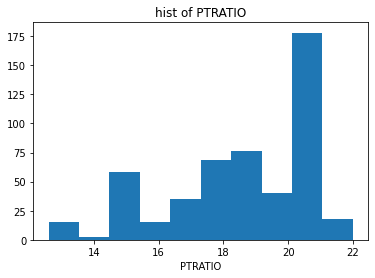

In [130]:
plt.hist(boston_df['PTRATIO'])
plt.title("hist of PTRATIO")
plt.xlabel('PTRATIO')
plt.show()


In [105]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# H0 = no difference in median value of houses bounded by the Charles river
# H1 = there's significant difference in median value of houses bounded by the Charles river



In [136]:
# conducted a test of equality of variance and found the variances are not equal

scipy.stats.levene(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], center = 'mean')




LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [137]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = False)


# Pvalue is less than 0.05 which means we will reject the null hypothesis and confirm there's 
# significant difference in median value of houses bounded by the Charles river

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

In [109]:
# tried also using regression ttest and got same results

## X is the input variables (or independent variables)
X = boston_df['CHAS']
X
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           7.39e-05
Time:                        20:27:46   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0938      0.418     52.902      0.000      21.273      22.914
CHAS           6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# H0: no difference in median values of houses for each proportion of owner occupied units built prior to 1940
# H1: there is difference in median values of houses for each proportion of owner occupied units built prior to 1940

In [139]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
# since the p-value is greater than 0.05, the variances are equal

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [153]:
thirty5_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirty5_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older =  boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [154]:
# one way anova
f_statistic, p_value = scipy.stats.f_oneway(thirty5_lower, thirty5_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

# we will reject the null hypothesis since p-value is less than 0.05

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [115]:
# using regression
X = pd.get_dummies(boston_df[['age_group']])
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     36.41
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           1.71e-15
Time:                        20:38:13   Log-Likelihood:                -1806.0
No. Observations:                 506   AIC:                             3618.
Df Residuals:                     503   BIC:                             3631.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                18.1292      0.321     56.399      0.000      17.498      18.761
age_group_35 years and younger        9.6466      0.715     13.496      0.000       8.242      11.051
age_group_70 years and older          1.6642      0.482      3.451      0.001       0.717       2.612
age_group_between 35 and 70 years     6.8184      0.627     10.875      0.000       5.587       8.050
==============================================================================
Omnibus:                      158.454   Durbin-Watson:                   0.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.356
Skew:                           1.592   Prob(JB):                     3.84e-86
Kurtosis:                       5.919   Cond. No.                     2.03e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.77e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and 
# proportion of non-retail business acres per town? (Pearson Correlation)

# H0: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
# H1: there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [152]:
# we completed the scatter plot earlier
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

# since the p value is less than 0.05 we will reject the null hypothesis and confirm there is a correlation

(0.763651446920915, 7.913361061239593e-98)

In [120]:
# What is the impact of an additional weighted distance  to the five Boston employment 
# centres on the median value of owner occupied homes? (Regression analysis)

# H0: no impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
# H1: there is an impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes


## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

# we will reject the null hypothesis as the p value is less than 0.05 and confirm there is an impact of an additional weighted distance to the five 
# Boston employment centres on the median value of owner occupied homes

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           1.21e-08
Time:                        20:53:01   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""